In [1]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# import dataset from external storage
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
# check shape of dataframe
df.shape

(398, 9)

In [22]:
# drop car name for better prediction
df.drop('car name', axis = 1, inplace = True)

In [23]:
# check null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [24]:
# check information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 26.0 KB


**In Our Data Frame Horsepower Column Has String Data Type But It Should Be Integer Data Type So We Have To Convert It**

In [5]:
# check unique values for horsepower column
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
# remove uncommon data from horsepower column
df = df[df['horsepower'] != '?']

In [13]:
# convert data type of horsepower column
df['horsepower'] = df['horsepower'].astype(int)

In [25]:
# check info after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int32(1), int64(4)
memory usage: 26.0 KB


In [11]:
# data frame shape after cleaning
df.shape

(392, 9)

In [15]:
# check description of data and check there is any outliers or not
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**In Our Data Frame There Is No Outliers So Our Data Frame Is Now Very Clean**

# Start Model Building

In [31]:
# create X and y
X = df.drop('mpg',axis = 1)
y = df['mpg']

In [32]:
# import train test split for split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
# import decision tree regressor for train model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [34]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred = dtr.predict(X_test)

In [47]:
# import r2 score and mean squared error for check accuracy of our model
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [41]:
print('R 2 Square:', r2_score(y_test,y_pred))
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))

R 2 Square: 0.8590434656459018
Mean Squared Error: 8.874050632911391


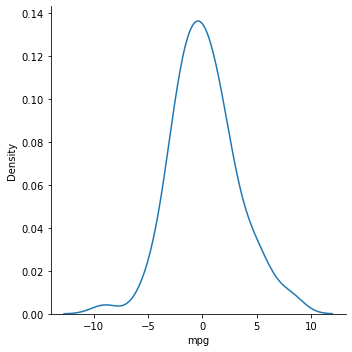

In [43]:
sns.displot(y_pred-y_test, kind = 'kde')
plt.show()

**We Get 85% R2 Score Thats Why We Can Considar This Is A Good Model**

# Check Cross Val Score With Diff.-Diff. Depth

In [50]:
from sklearn.model_selection import cross_val_score
depth = [1,2,3,4,5,6,7,8,9,10,20]
for i in depth:
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train,y_train)
    train_acc = r2_score(y_train,dtr.predict(X_train))
    val_acc = cross_val_score(dtr,X_train,y_train, cv = 10, scoring=make_scorer(r2_score))
    print('Depth:', i, 'Training Accurecy:', train_acc, 'Val Accuracy:', np.mean(val_acc))

Depth: 1 Training Accurecy: 0.5628085153281133 Val Accuracy: 0.5225192877623732
Depth: 2 Training Accurecy: 0.7282996980544212 Val Accuracy: 0.6905198402284378
Depth: 3 Training Accurecy: 0.8291702356282791 Val Accuracy: 0.7510045736187034
Depth: 4 Training Accurecy: 0.8933533028339861 Val Accuracy: 0.7808993524527803
Depth: 5 Training Accurecy: 0.9259782098036009 Val Accuracy: 0.7860243753608459
Depth: 6 Training Accurecy: 0.9486681963650284 Val Accuracy: 0.7731453708279157
Depth: 7 Training Accurecy: 0.965096274289419 Val Accuracy: 0.7644800220847012
Depth: 8 Training Accurecy: 0.9795327228188823 Val Accuracy: 0.7264615389907874
Depth: 9 Training Accurecy: 0.98902759153404 Val Accuracy: 0.7560210122003742
Depth: 10 Training Accurecy: 0.9941562964287929 Val Accuracy: 0.7395262517350482
Depth: 20 Training Accurecy: 1.0 Val Accuracy: 0.7202699805916466


# Important Features

In [53]:
important = dtr.feature_importances_
list(zip(important,X_test.columns))

[(0.004200525236181239, 'cylinders'),
 (0.6298152035060867, 'displacement'),
 (0.1490837355450155, 'horsepower'),
 (0.07080931171104758, 'weight'),
 (0.03200461643652213, 'acceleration'),
 (0.11304979443189073, 'model year'),
 (0.0010368131332561905, 'origin')]